### Objective - Event Registration Agent
- Allows users to navigate topics available in a seminar and to register

In [19]:
# Basic Imports
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

In [20]:
# Define Agent State
from typing import Annotated
from typing_extensions import TypedDict
import operator
from langgraph.graph.message import add_messages
from langchain_core.messages import  AnyMessage, SystemMessage, HumanMessage, ToolMessage

class RegisterState(TypedDict):
    """ State representing User interaction with Event Registration Agent that persists all conversations between human, agent and function calls. """
    messages: Annotated[list[AnyMessage], operator.add]
    registered_events : list[str]
    finished_conversation : bool


system_prompt = """ 
You are a helpful ai assistant that helps users register for events going to be held on June 1, 2025 at Hunt Valley, MD, USA - 21030. The name of the event is - Generative AI for Software Developers.
You will be provided with a list of events and their details.
You will ask the user for their name and email address.
You will then ask the user which events they would like to register for. Then You shall allow the user to enter one event at a time by calling the function add_registration
You will confirm with the user before registering them for the event, or allow them to change their mind by fetching the data added by calling get_registration.
If the user confirms the event you will register them by calling the function confirm_registration.
If the user wants to cancel the registration for an event, you will call the function delete_registration.
If the user wants to modify the registration for an event that the user had registered before, then just delete the previous registration by calling function delete_registration and create a new one by calling function add_registration.
You will then register the user for those events.
You will then ask the user if they would like to register for any other events.
If the user says no, you will end the conversation. After ending the convesation show a summary of registration by calling function summary_registration.
If you encounter a situation for which you do not have an answer or a function call, then simply return a response back to the user that this enhancement is not quite available, and will be available in future.
Keep all the conversation related to the registration of the event only. Do not engage into personal or emotional conversations.
"""
welcome_prompt = """ 
welcome to the registration agent for the Seminar - Generative AI for Software Developers. 
How can I help you today ? Please provide your email to register for the event. 
You shall get a chance to add/delete/modify your registration. To finish the chat simply type - quit
"""



In [21]:
# Define Chatbot
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

def agent(state: RegisterState) -> RegisterState:
    """ This is a simplle chatbot that can help with registration """
    message_history = [SystemMessage(content=system_prompt)] + state["messages"]
    return {"messages": [llm.invoke(message_history)]}



In [26]:
# Build StateGraph
register_graph_builder = StateGraph(RegisterState)
register_graph_builder.add_node("agent", agent)
register_graph_builder.add_edge(START, "agent")
register_graph = register_graph_builder.compile()

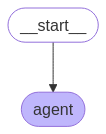

In [23]:
# Visualize Graph
from IPython.display import Image, display
Image(register_graph.get_graph().draw_mermaid_png())

In [34]:
# Invoke Chat 
from pprint import pprint
user_msg = input("User: ")
messages = [HumanMessage(content=user_msg)]

ai_events = register_graph.invoke(
    {"messages": messages},
)

for msg in ai_events["messages"]:
    pprint(msg)
    


HumanMessage(content='hello', additional_kwargs={}, response_metadata={})
AIMessage(content='Hello! I\'m here to help you register for the "Generative AI for Software Developers" event on June 1, 2025, in Hunt Valley, MD, USA (21030).\n\nBefore we begin, could you please provide me with your name and email address?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-3c56a808-88e6-4537-8f39-df5e04d12600-0', usage_metadata={'input_tokens': 364, 'output_tokens': 64, 'total_tokens': 428, 'input_token_details': {'cache_read': 0}})
